In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df3 = pd.read_csv('tablero3_output.csv')
df3.head()

,Tamanio,Iteracion,Ntiradas_Ganar,LineaGanadora
0,3,0,9,N
1,3,1,9,N
2,3,2,9,D
3,3,3,9,V
4,3,4,7,H


In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tamanio         5000 non-null   int64 
 1   Iteracion       5000 non-null   int64 
 2   Ntiradas_Ganar  5000 non-null   int64 
 3   LineaGanadora   5000 non-null   object
dtypes: int64(3), object(1)
memory usage: 156.4+ KB


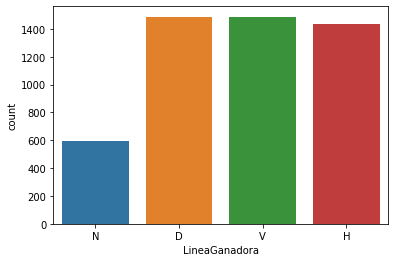

In [5]:
sns.countplot(x='LineaGanadora',data=df3)

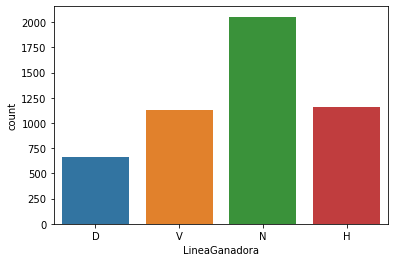

In [6]:
df4 = pd.read_csv('tablero4_output.csv')
sns.countplot(x='LineaGanadora',data=df4)

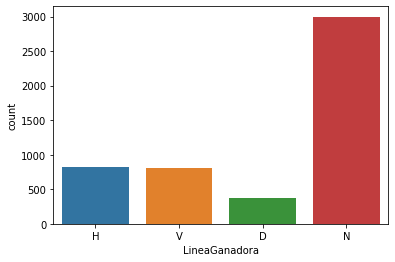

In [7]:
df5 = pd.read_csv('tablero5_output.csv')
sns.countplot(x='LineaGanadora',data=df5)

Observamos cómo a medida que aumenta el tamaño del tablero, disminuye mucho la probabilidad de ganar una partida
formando líneas de N símbolos iguales. Solamente cuando el tablero tiene de lado 3 ó 4 aparece una probabilidad
de ganar más apreciable.

## Gráficos a representar.

* Fig.1) Gráfico en el que se visualiza la probabilidad de ganar en función del tamaño del tablero.

* Fig.2) Gráfico en el que se represente el porcentaje de tiradas respecto a las totales posibles de los tres modos de ganar juntos en función del tamaño  del  tablero. 

* Fig.3) Gráfico de puntos de la Fig.2

### Fig.1 : Probabilidad de ganar en función del tamaño del tablero.

Prob. de ganar = # veces_ganar / # total_partidas

In [8]:
df3.columns

Index(['Tamanio', 'Iteracion', 'Ntiradas_Ganar', 'LineaGanadora'], dtype='object')

In [9]:
df3[df3['LineaGanadora']!='N'].count()['Tamanio']

4409

In [10]:
df6 = pd.read_csv('tablero6_output.csv')
df7 = pd.read_csv('tablero7_output.csv')
df8 = pd.read_csv('tablero8_output.csv')
df9 = pd.read_csv('tablero9_output.csv')
df10 = pd.read_csv('tablero10_output.csv')

In [11]:
dftotal = pd.concat([df3,df4,df5,df6,df7,df8,df9,df10])

In [12]:
dftotal.describe()

,Tamanio,Iteracion,Ntiradas_Ganar
count,40000.000000,40000.000000,40000.000000
mean,6.500000,2499.500000,46.628850
std,2.291316,1443.393687,30.677157
min,3.000000,0.000000,5.000000
25%,4.750000,1249.750000,16.000000
50%,6.500000,2499.500000,36.000000
75%,8.250000,3749.250000,64.000000
max,10.000000,4999.000000,100.000000


In [13]:
dftotal.head()

,Tamanio,Iteracion,Ntiradas_Ganar,LineaGanadora
0,3,0,9,N
1,3,1,9,N
2,3,2,9,D
3,3,3,9,V
4,3,4,7,H


Para obtener el número de veces que se da 'ganar' en función del tamaño del tablero, podemos usar el método
'groupby', y una función que cuente el número de veces que no se da la ocurrencia 'N' en la columna
'LineaGanadora'.

In [14]:

#ncolganar(dftotal,'LineaGanadora')
#serie_ganar = dftotal.groupby('Tamanio').apply(lambda x : x!='N',dftotal['LineaGanadora']).sum()

dfganar = dftotal[dftotal['LineaGanadora']!='N']
s = dfganar.groupby('Tamanio').count()['LineaGanadora']

In [15]:
dftotal['Iteracion'].max()+1

5000

In [16]:
y = np.array(s)/(dftotal['Iteracion'].max() + 1)

In [17]:
y

array([0.8818, 0.5892, 0.4006, 0.2504, 0.1496, 0.0816, 0.047 , 0.0252])

In [18]:
x = np.array([i for i in range(3,11)])

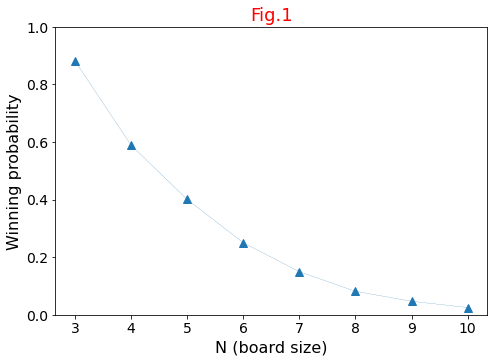

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('N (board size)',fontsize = 16)
ax.set_ylabel('Winning probability',fontsize = 16)
ax.set_title('Fig.1',fontsize=18,color='red')
ax.plot(x,y,lw = 0.2,marker='^',markersize=8)
ax.set_ylim([0.0,1.0])
for i in ax.get_xticklabels() + ax.get_yticklabels():
    i.set_fontsize(14)


    
fig.savefig("Fig1_tableroNR.png",bbox_inches='tight')  # No se guarda ni el título ni los nombres de los ejes a
                                                       # no ser que marquemos la opción bbox_inches = 'tight'

Para más info: https://matplotlib.org/3.1.1/api/text_api.html#matplotlib.text.Text

Sobre savefig : https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.04-Saving-Plots/

### Fig 2: Comparación de los tres modos de ganar en función del tamaño del tablero.

Fig. 2: gráfico de barras donde se representen juntos los tres modos:

  --> Eje X : diferentes valores del tamaño del tablero.
  
  --> Eje Y : Número de tiradas que se necesitan para ganar respecto a las totales (tamaño ** 2)
  

In [36]:
dftotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tamanio         40000 non-null  int64 
 1   Iteracion       40000 non-null  int64 
 2   Ntiradas_Ganar  40000 non-null  int64 
 3   LineaGanadora   40000 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


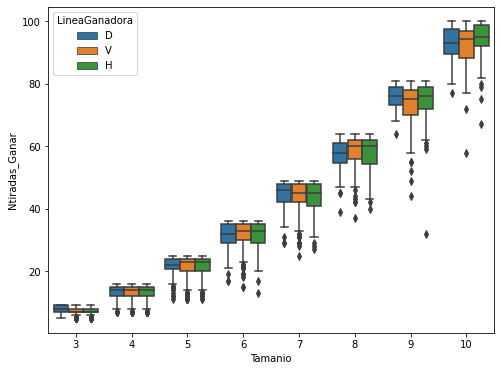

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Tamanio', y='Ntiradas_Ganar',data=dfganar, hue = 'LineaGanadora')

In [38]:
arr = np.array(dfganar['Ntiradas_Ganar'])

In [39]:
arrt = np.array(dfganar['Tamanio'])

In [40]:
arr = arr/(arrt**2)

In [41]:
dfganar['Ntiradas_norm']=arr

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
dfganar.head()

,Tamanio,Iteracion,Ntiradas_Ganar,LineaGanadora,Ntiradas_norm
2,3,2,9,D,1.000000
3,3,3,9,V,1.000000
4,3,4,7,H,0.777778
5,3,5,5,V,0.555556
6,3,6,8,V,0.888889


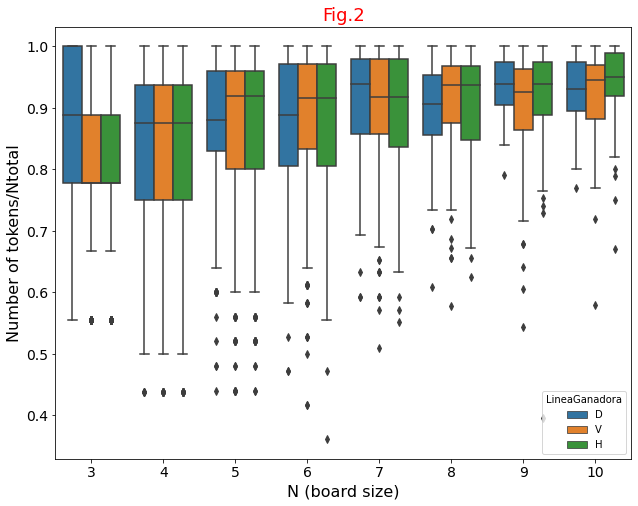

In [45]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('N (board size)',fontsize = 16)
ax.set_ylabel('Number of tokens / Ntotal',fontsize = 16)
ax.set_title('Fig.2',fontsize=18,color='red')
for i in ax.get_xticklabels() + ax.get_yticklabels():
    i.set_fontsize(14)

sns.boxplot(x='Tamanio', y='Ntiradas_norm',data=dfganar, hue='LineaGanadora').set(xlabel='N (board size)',
                                                                                 ylabel = 'Number of tokens/Ntotal')

fig.savefig("Fig2_tableroNR.png",bbox_inches='tight')


In [28]:
def mifig(xla,yla,tit):
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlabel(xla,fontsize = 16)
    ax.set_ylabel(yla,fontsize = 16)
    ax.set_title(tit,fontsize=18,color='red')
    for i in ax.get_xticklabels() + ax.get_yticklabels():
        i.set_fontsize(14)
    
    return fig,ax


    

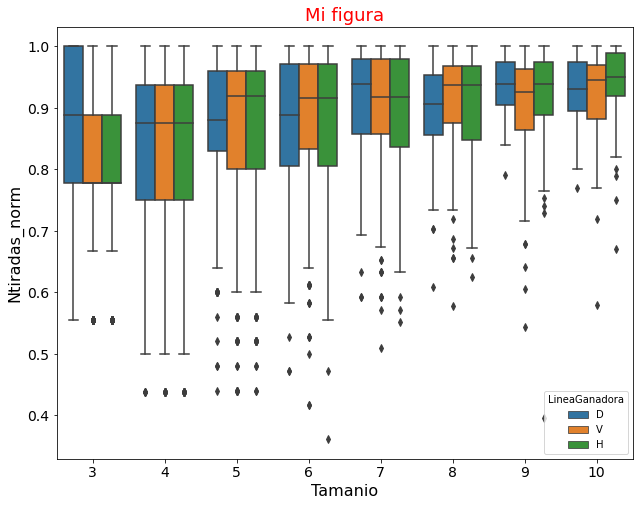

In [29]:
fig,ax = mifig('Tamanio', 'Ntiradas_norm','Mi figura')

sns.boxplot(x='Tamanio', y='Ntiradas_norm',data=dfganar, hue='LineaGanadora')

### Fig.3 : gráfico de puntos de la Figura 2

In [30]:
dfganar.head()

,Tamanio,Iteracion,Ntiradas_Ganar,LineaGanadora,Ntiradas_norm
2,3,2,9,D,1.000000
3,3,3,9,V,1.000000
4,3,4,7,H,0.777778
5,3,5,5,V,0.555556
6,3,6,8,V,0.888889


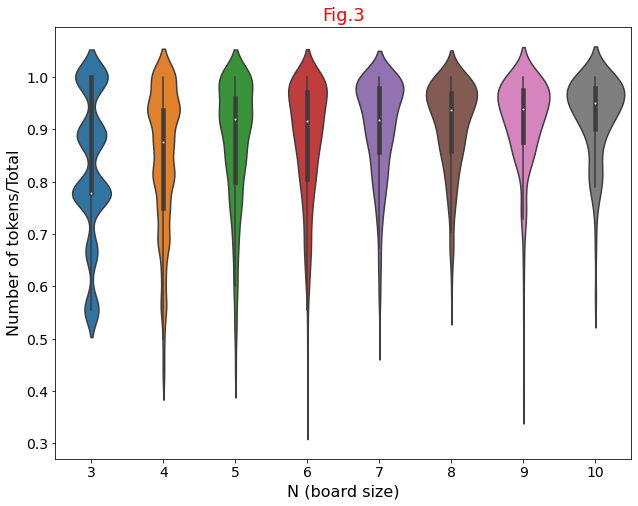

In [46]:
fig,ax = mifig('N (board size)', 'Number of tokens/Total','Fig.3')

sns.violinplot(x='Tamanio',y='Ntiradas_norm', data=dfganar).set(xlabel='N (board size)',
                                                                ylabel='Number of tokens/Total')

plt.savefig('Fig3_tableroNR',bbox_inches='tight')